<a href="https://colab.research.google.com/github/ali-kmirzaei/YOLO/blob/main/train.YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization:**

In [ ]:
!git clone https://github.com/ultralytics/yolov5 

In [ ]:
%cd yolov5
!pip install -r requirements.txt 

In [ ]:
# import dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive


In [ ]:
!cp -rf /mydrive/last.pt ../yolov5/weights.pt

In [ ]:
!unzip /mydrive/newPack.zip -d data

In [ ]:
!cp /mydrive/last.pt data/last_trained.pt

In [ ]:
!unzip /mydrive/extra.zip -d data/images/extra_test

# **split train and test files:**

In [3]:
import os
import glob
import random
import shutil

In [ ]:
!rm -rf data/images
!rm -rf data/labels

!mkdir data/images
!mkdir data/images/test
!mkdir data/images/train

!mkdir data/labels
!mkdir data/labels/test
!mkdir data/labels/train

In [ ]:
image_list = list()
label_list = list()
total_tuples = list()

total = glob.glob('data/newPack/*')
total.sort()

for i in range(0, len(total)-1, 2):
  total_tuples.append((total[i], total[i+1]))

# # validate list:
# for tpl in total_tuples:
#   if tpl[0][13: 23] != tpl[1][13: 23]:
#     print("ERROR")

random.shuffle(total_tuples)

num = 1085
for i in range(num):
  # IMG
  src = total_tuples[i][0]
  dst = 'data/images/train/'+src[13:]
  shutil.copyfile(src, dst)
  # LBL
  src = total_tuples[i][1]
  dst = 'data/labels/train/'+src[13:]
  shutil.copyfile(src, dst)

for i in range(num, 1550):
  # IMG
  src = total_tuples[i][0]
  dst = 'data/images/test/'+src[13:]
  shutil.copyfile(src, dst)
  # LBL
  src = total_tuples[i][1]
  dst = 'data/labels/test/'+src[13:]
  shutil.copyfile(src, dst)

In [ ]:
# Check Distributions

alls = glob.glob('data/newPack/*.jpg')
trains = glob.glob('data/images/train/*')
tests = glob.glob('data/images/test/*')
nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

cnt = 0
for all in alls:
  if all[13] in nums:
    cnt += 1
all_per = 100 * cnt / len(alls)


cnt = 0
for test in tests:
  if test[18] in nums:
    cnt += 1
test_per = 100 * cnt / len(tests)

cnt = 0
for train in trains:
  if train[19] in nums:
    cnt += 1
train_per = 100 * cnt / len(trains)

print(all_per, test_per, train_per)

58.064516129032256 57.204301075268816 58.433179723502306


# **train and test and visualization model:**

In [ ]:
!rm -rf runs/train/yolo_idcard32

In [ ]:
# TRAIN
!python train.py --img 640 --cfg data/yolov5s.yaml --batch 64 --epochs 100 --data idcard_data.yaml --weights yolov5s.pt --name yolo_idcard3 --cache

In [ ]:
# Free Space!

In [ ]:
# TEST
!python val.py --data idcard_data.yaml --weights runs/train/yolo_idcard35/weights/last.pt --name yolo_idcard3 --task val

In [ ]:
# Visualize
from utils.plots import plot_results
plot_results('results.csv')

In [ ]:
# DETECT
!python detect.py --source 01.jpeg --weights weights.pt --name yolo_idcard_extra --save-crop

In [ ]:
!cp -r runs/detect/ /mydrive/YOLOv5Performance/new_detect

In [ ]:
!mkdir /mydrive/YOLOv5Performance/200e/val

In [ ]:
!rm -rf runs/detect/yolo_idcard_extra2

# **OCR:**

In [ ]:
!pip uninstall imgaug

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr-fas

In [28]:
!pip install --ignore-installed Pillow==9.0.0

  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)


In [1]:
from PIL import Image
import pytesseract
import cv2 as cv

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
IMG = Image.open('id2.jpg')
# IMG.save("id2.jpg", dpi=(300,300))
# IMG = Image.open('id.jpg')
# IMG = cv.cvtColor(IMG, cv.COLOR_RGB2BGR)
# IMG = IMG.convert("0")
# IMG = cv.imread('id.jpg', cv.IMREAD_GRAYSCALE)
LANG = "fas"
CONFIG = "--psm 11 --oem 3"
print(pytesseract.image_to_string(IMG, lang=LANG))
IMG

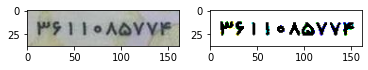

38 162
12 11
12 12
12 13
12 17
12 18
12 21
12 22
12 23
12 24
12 29
12 30
12 31
12 32
12 33
13 11
13 12
13 13
13 16
13 17
13 18
13 19
13 21
13 22
13 23
13 24
13 28
13 29
13 30
13 31
13 32
13 33
14 11
14 12
14 13
14 16
14 17
14 18
14 19
14 21
14 22
14 23
14 24
14 27
14 28
14 29
14 30
14 31
14 32
14 33
15 11
15 12
15 13
15 14
15 16
15 17
15 18
15 19
15 21
15 22
15 23
15 24
15 27
15 28
15 29
15 30
15 32
16 11
16 12
16 13
16 14
16 15
16 16
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
16 27
16 28
16 29
16 30
17 11
17 12
17 13
17 14
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 27
17 28
17 29
17 30
17 31
17 32
17 33
17 34
17 35
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 20
19 21
19 25
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
20 11
20 12
20 13
20 14
20 29
20 30
20 31
20 32
20 33
20 34
21 12
21 13
21 14
21 30
21 31
21 32
21 33
22 12
22 13
22 

IndexError: ignored

In [76]:
img = cv.imread('id2.jpg')

ret1,dst = cv.threshold(img, 127, 255, cv.THRESH_BINARY)


# dst = img[10:30, 10:25]
# dst = img[:, 10:15]
# ret1,dst = cv.threshold(dst, 127, 255, cv.THRESH_BINARY)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# dst = img[20]
# i = 0
# for pixel in dst:
#   if 0 in pixel:
#     print(i)
#   i += 1


rows = len(img)
cols = len(img[0])
print(rows, cols)

for i in range(cols):
  for j in range(rows):
    if 0 in dst[i][j]:
      print(i, j)